# Análisis Estadístico Multivariado
# 29 de Noviembre de 2025
# Proyecto final
# Acoyani Garrido Sandoval

## 1. Descripción

Consiste en determinar la relación entre una variable dependiente y una o más variables independientes a través de regresión logística múltiple. Se usará para ello un conjunto de datos de patrones de órdenes de comida rápida en diferentes ciudades de India, desarrollado por Prince Rajak y disponible en [Kaggle](https://www.kaggle.com/datasets/prince7489/fast-food-ordering-pattern-dataset).



In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import json
import seaborn
import datetime

# Boilerplate: necesitamos un JSON encoder capaz de manejar números de Numpy
class SerializadorJSONParaLaClaseDeTemores(json.JSONEncoder):
   def default(self, objeto):
      # numpy.int64: lo convertimos a un número estándar de Python para que el serializador estándar
      # pueda manejarlo
      if isinstance(objeto, numpy.int64) or isinstance(objeto, numpy.int32):
         return objeto.item()
      elif isinstance(objeto, datetime.Timestamp):
         return str(objeto)
      # Cualquier otro tipo: usamos el serializador estándar
      else:
         return json.JSONEncoder.default(self, objeto)


# Tomamos la primera columna como índice, porque es un número de ID
df_pedidos = pandas.read_csv("fast_food_ordering_dataset.csv", index_col=0)

## 2. Análisis descriptivo

Comenzamos por desarrollar un análisis descriptivo de las variables del conjunto de datos.

Cada registro de nuestro conjunto de datos es un pedido individual de comida rápida, cuyas variables son:
- **order_id:** Número de pedido
- **order_time:** Fecha y hora del pedido en tiempo de India
- **city:** Ciudad donde fue hecho el pedido
- **cuisine_type:** Estilo de cocina
- **order_value:** Precio del pedido en rupias
- **delivery_time_minutes:** Tiempo del pedido en minutos
- **items_count:** Cuántos elementos tiene el pedido
- **payment_method:** Método de pago:
   - **UPI:** *Unified Payments Interface,* un sistema de pagos electrónicos operado por el banco nacional de India
   - **Wallet:** pagos hechos mediante sistemas orientados a dispositivos móviles, tales como Apple y Google Pay.
   - **Credit Card:** tarjeta de crédito
   - **Debit Card:** tarjeta de débito
   - **Cash:** efectivo

El análisis que haremos incluirá:

1. **Para las variables de razón:** Medidas de tendencia central y de dispersión: moda, media, mediana, rango, desviación estándar, rango intercuartílico, y diagrama de caja.
   - Minutos de entrega
   - Cantidad de elementos
   - Precio
1. **Para la variable de intervalo:** Distribución (histograma), moda y mediana
   - Hora del pedido
1. **Para las variables nominales:** Conteo en gráfica, y porcentaje
   - Ciudad
   - Estilo de cocina
   - Método de pago


In [2]:
# Parte 1: medidas de las variables de razón
variables_razon = [ "delivery_time_minutes", "items_count", "order_value" ]
variables_intervalo = [ "order_time" ]
variables_nominales = [ "city", "cuisine_type", "payment_method" ]

# Medidas de las variables de razón
variables_razon_medidas = {}
for una_variable in variables_razon:
   medidas = \
   {
      "promedio": df_pedidos[una_variable].mean(),
      "mediana": df_pedidos[una_variable].median(),
      "moda": df_pedidos[una_variable].mode()[0],
      "varianza": df_pedidos[una_variable].var(),
      "desvstd": df_pedidos[una_variable].std(),
      "rango": df_pedidos[una_variable].max() - df_pedidos[una_variable].min(),
      "RI": df_pedidos[una_variable].quantile(0.75) - df_pedidos[una_variable].quantile(0.25)
   }
   variables_razon_medidas.update({ una_variable: medidas })

print(f"Medidas de las variables de razón: {json.dumps(variables_razon_medidas, indent=3, cls=SerializadorJSONParaLaClaseDeTemores)}")


Medidas de las variables de razón: {
   "delivery_time_minutes": {
      "promedio": 44.696,
      "mediana": 44.0,
      "moda": 43,
      "varianza": 299.28214829659316,
      "desvstd": 17.29977307066752,
      "rango": 59,
      "RI": 30.25
   },
   "items_count": {
      "promedio": 4.104,
      "mediana": 4.0,
      "moda": 5,
      "varianza": 3.8208256513026053,
      "desvstd": 1.9546932371353325,
      "rango": 6,
      "RI": 4.0
   },
   "order_value": {
      "promedio": 630.14666,
      "mediana": 619.0,
      "moda": 105.1,
      "varianza": 98622.8453276998,
      "desvstd": 314.04274442772885,
      "rango": 1094.5900000000001,
      "RI": 546.9575
   }
}


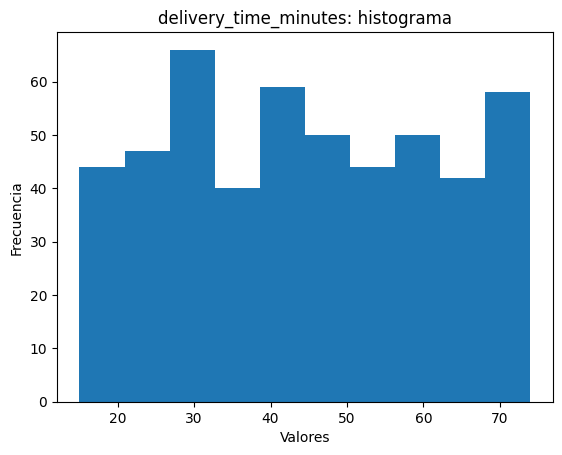

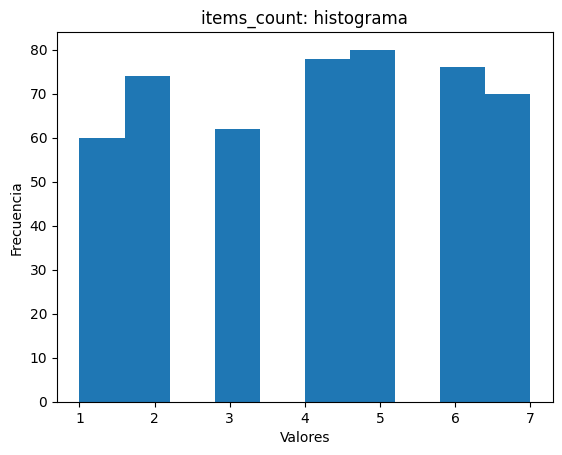

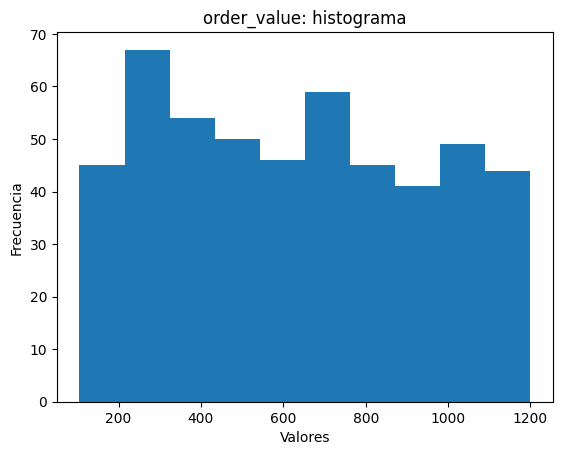

In [3]:
# Ahora grafico los histogramas
for una_variable in variables_razon:
   pyplot.figure()
   pyplot.hist(df_pedidos[una_variable])
   pyplot.xlabel("Valores")
   pyplot.ylabel("Frecuencia")
   pyplot.title(f"{una_variable}: histograma")
   pyplot.show()


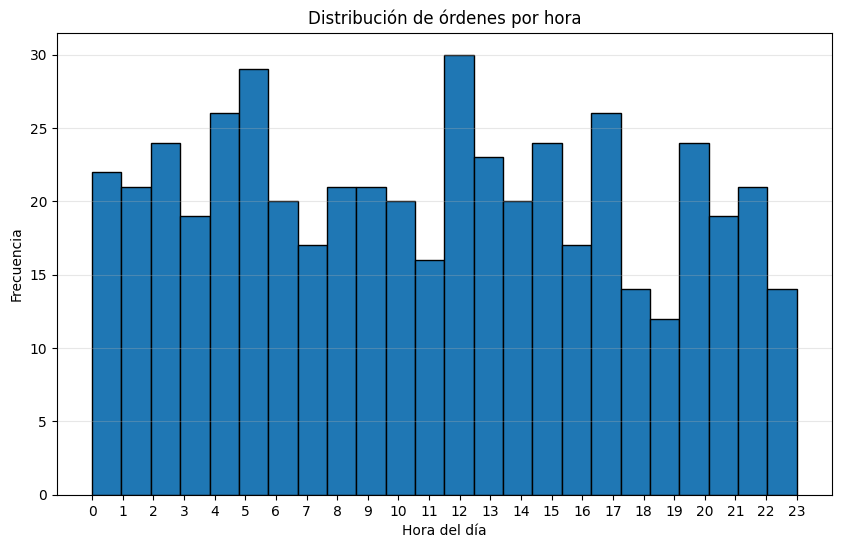

Medidas de la variable de intervalo: {
   "order_time": {
      "moda": 12,
      "mediana": 11.0
   }
}


In [4]:
# Parte 2: medidas de la variable de intervalo: moda y mediana
variables_intervalo_medidas = {}

# Convertimos order_time a datetime.datetime y extraemos la hora
# Tenemos que dejarla en forma de una hora del día
df_pedidos["order_time"] = pandas.to_datetime(df_pedidos["order_time"])
df_pedidos["order_time"] = df_pedidos["order_time"].dt.hour

# Sacamos moda y mediana
hora_moda = df_pedidos["order_time"].mode()[0]
hora_mediana = df_pedidos["order_time"].median()

# Sacamos un histograma de pedidos por hora
pyplot.figure(figsize=(10, 6))
pyplot.hist(df_pedidos["order_time"], bins=24, edgecolor='black')
pyplot.xlabel('Hora del día')
pyplot.ylabel('Frecuencia')
pyplot.title('Distribución de órdenes por hora')
pyplot.xticks(range(0, 24))
pyplot.grid(axis='y', alpha=0.3)
pyplot.show()

# Guardamos nuestras medidas
variables_intervalo_medidas["order_time"] = {
   "moda": hora_moda,
   "mediana": hora_mediana
}

print(f"Medidas de la variable de intervalo: {json.dumps(variables_intervalo_medidas, indent=3, cls=SerializadorJSONParaLaClaseDeTemores)}")


In [5]:
# Parte 3: medidas de las variables nominales
# Sacamos conteo y porcentaje
variables_nominales_medidas = {}

for una_variable in variables_nominales:
   medidas = \
   {
      "conteos": {},
      "porcentajes": {}
   }

   # En cada variable, sacamos los datos únicos
   valores_nominales = list(numpy.unique(numpy.array(df_pedidos[una_variable])))
   
   # Luego sacamos cuánto hay de cada valor único
   # De una vez sacamos el total
   sumatoria = 0
   for un_valor in valores_nominales:
      columna = df_pedidos[una_variable]
      columna_filtrada = columna[ columna == un_valor ]
      medidas["conteos"].update({ un_valor: len(columna_filtrada)})
      sumatoria += len(columna_filtrada)
   
   # Luego sacamos los porcentajes (del 0 al 1)
   for clave, valor in medidas["conteos"].items():
      medidas["porcentajes"].update({ clave: float(valor) / sumatoria })

   # Revisamos el resultado y lo incorporamos
   variables_nominales_medidas.update({ una_variable: medidas })

print(f"Medidas de las variables nominales: {json.dumps(variables_nominales_medidas, indent=3, cls=SerializadorJSONParaLaClaseDeTemores)}")


Medidas de las variables nominales: {
   "city": {
      "conteos": {
         "Ahmedabad": 72,
         "Bengaluru": 64,
         "Chennai": 51,
         "Delhi": 46,
         "Hyderabad": 76,
         "Kolkata": 62,
         "Mumbai": 71,
         "Pune": 58
      },
      "porcentajes": {
         "Ahmedabad": 0.144,
         "Bengaluru": 0.128,
         "Chennai": 0.102,
         "Delhi": 0.092,
         "Hyderabad": 0.152,
         "Kolkata": 0.124,
         "Mumbai": 0.142,
         "Pune": 0.116
      }
   },
   "cuisine_type": {
      "conteos": {
         "Bakery": 51,
         "Chinese": 49,
         "Fast Food": 74,
         "Healthy": 61,
         "Italian": 70,
         "Mexican": 62,
         "North Indian": 62,
         "South Indian": 71
      },
      "porcentajes": {
         "Bakery": 0.102,
         "Chinese": 0.098,
         "Fast Food": 0.148,
         "Healthy": 0.122,
         "Italian": 0.14,
         "Mexican": 0.124,
         "North Indian": 0.124,
         "

C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=conteos, y=valores, palette="viridis", ax=eje_0)
C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=porcentajes, y=valores, palette="magma", ax=eje_1)


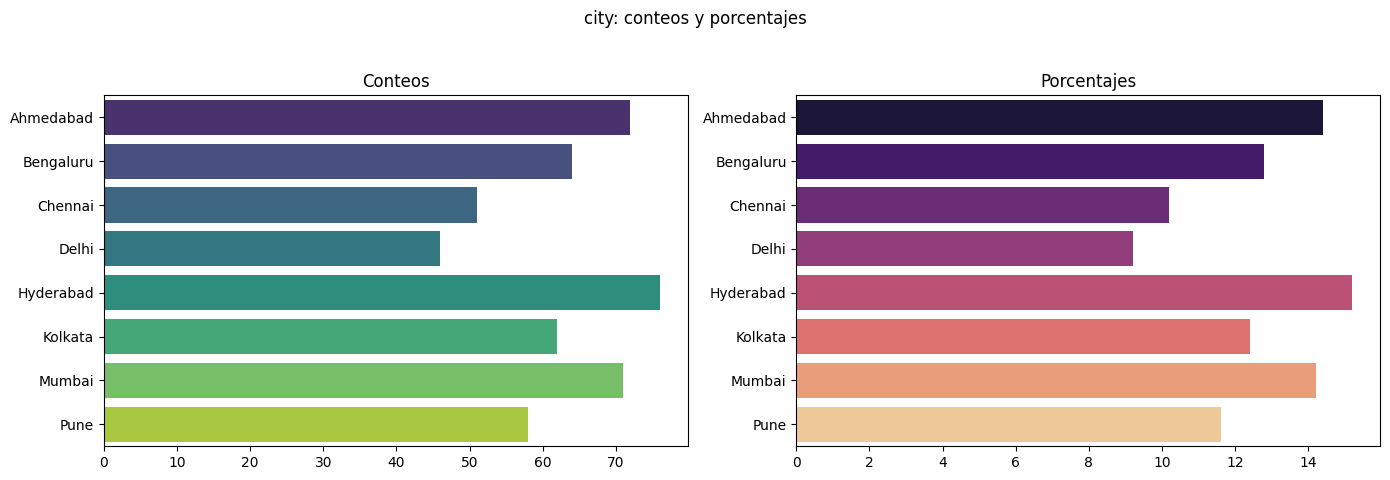

C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=conteos, y=valores, palette="viridis", ax=eje_0)
C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=porcentajes, y=valores, palette="magma", ax=eje_1)


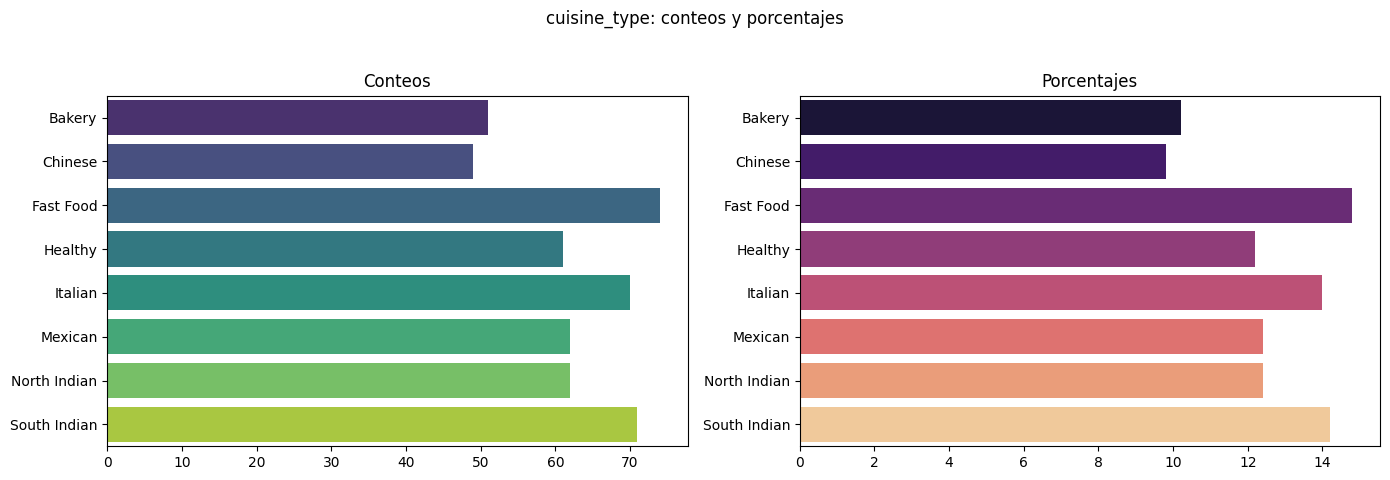

C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=conteos, y=valores, palette="viridis", ax=eje_0)
C:\Users\Midriffy\AppData\Local\Temp\ipykernel_3692\1598830009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=porcentajes, y=valores, palette="magma", ax=eje_1)


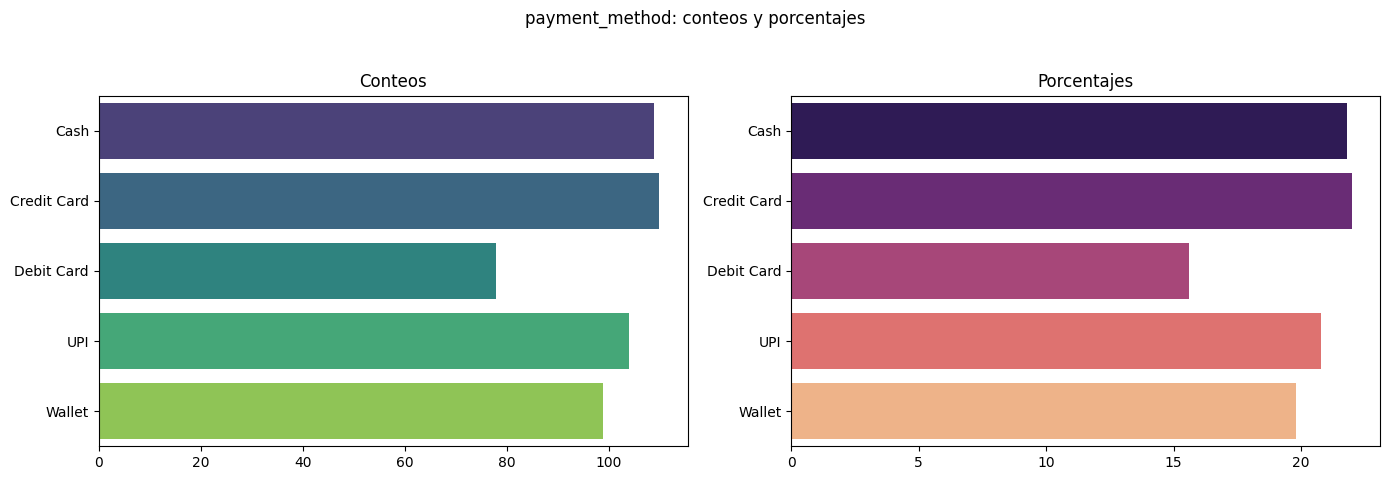

In [6]:
# Graficamos el paso anterior
for una_variable in variables_nominales:
   medidas = variables_nominales_medidas[una_variable]
   conteos = [ valor for _, valor in medidas["conteos"].items() ]
   porcentajes = [ porcentaje * 100 for _, porcentaje in medidas["porcentajes"].items() ]
   valores = [ clave for clave, _ in medidas["conteos"].items() ]

   # Creamos una gráfica de 14 x 5 "pulgadas"
   figura, ejes = pyplot.subplots(1, 2, figsize=(14,5))
   figura.suptitle(f"{una_variable}: conteos y porcentajes")

   eje_0 = ejes[0]
   seaborn.barplot(x=conteos, y=valores, palette="viridis", ax=eje_0)
   eje_0.set_title("Conteos")

   eje_1 = ejes[1]
   seaborn.barplot(x=porcentajes, y=valores, palette="magma", ax=eje_1)
   eje_1.set_title("Porcentajes")

   # Pyplot por sí mismo no acomoda bien las dimensiones de las etiquetas
   # Para eso, usamos tight_layout. El parámetro rect indica cuánto debe abarcar el contenido de la
   # gráfica.
   pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
   pyplot.show()


## 5 y 3. Partición del conjunto de datos y selección de variables con método de regularización

Consiste en realizar selección de variables con el método de regularización L1 (Lasso) previo a la regresión logística.

Para llevar a cabo este proceso, hay que normalizar las escalas de los datos, ya que la técnica LASSO se basa en la manipulación de los coeficientes de la regresión logística, los cuales siguen la escala de las variables que representan.

En este paso también realizamos la partición del conjunto de datos en entrenamiento y prueba. Usamos para eso muestreo aleatorio uniforme, tomamos 80% del conjunto para entrenamiento, y dejamos 20% para prueba.

Como decisión de negocio, determinamos hacer nuestro modelo bajo el escenario de implementar en una plataforma de comida rápida a domicilio una función para presentar al usuario final un tiempo de entrega estimado; por lo que tomamos nuestro tiempo de entrega como variable dependiente. Será necesario también descartar las variables categóricas, pues la regresión logística sólo funciona con variables numéricas.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Antes de proceder, partimos nuestros datos. Para eso, train_test_split admite dataframes
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# El ejemplo del Jupyler notebook usa un dataset que ha sido ampliamente adoptado para practicar
# la regresión logística, ya que tiene 30 variables independientes y una variable independiente
# binaria.
# Aquí tenemos menos variables, y nuestra variable dependiente, que es el tiempo de entrega, es
# numérica y discreta. Adoptamos la convención de llamar "y" a nuestra variable dependiente, y "X"
# a nuestras variables independientes.
df_pedidos_sincategoricas = df_pedidos.copy()
y_tiempoentrega = df_pedidos_sincategoricas.pop("delivery_time_minutes")

# Los modelos de regresión logística funcionan mejor cuando son binarios, por lo que en vez de 
# estimar 90 posibles valores de y, mejor estimamos si simple y sencillamente nuestro pedido va a
# tardar más de 45 minutos en llegar
y_tiempoentrega = (y_tiempoentrega > 45).astype(int)

# La regresión logística sólo funciona con variables numéricas, por lo que hay que botar las 
# categóricas
df_pedidos_sincategoricas.pop("city")
df_pedidos_sincategoricas.pop("cuisine_type")
df_pedidos_sincategoricas.pop("payment_method")

# Particionamos nuestro conjunto
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(df_pedidos_sincategoricas, y_tiempoentrega, test_size=0.2, random_state=297974)

# Escalamos los datos
escalador = StandardScaler()
X_entrenamiento_escalao = escalador.fit_transform(X_entrenamiento)
X_prueba_escalao = escalador.transform(X_prueba)


## 4. Acerca del `penalty`

**Explica brevemente qué es el penalty, qué tipos de penalty hay para LASSO y sus diferencias:**

El *penalty* en LASSO es un término de regularización para la función objetivo de la regresión logística. Una forma de hacerlo es con el llamado *L1 penalty,* el cual es simplemente la sumatoria de los valores absolutos de los coeficientes beta multiplicado por un *parámetro de regularización* que controla la fuerza que tiene ese proceso de regularización.

El efecto que el *penalty* tiene en los modelos de regresión logística es reducir coeficientes a cero; entre mayor sea su fuerza, más coeficientes se reducen. Esto permite simplificar el modelo a través de eliminar características posiblemente irrelevantes de forma analítica. Es también por eso que es necesario normalizar la escala de las variables involucradas; de lo contrario, aplicar un parámetro de regularización para pedidos de miles de rupias a un juego de datos con variables que no pasan de 60 (minutos) resultaría en la cancelación de todos los coeficientes.


## 6. Entrenamiento de un modelo de regresión logística múltiple


In [8]:
# Ahora sí, entrenamos nuestro modelo con regularización L1 (LASSO)
modelo = LogisticRegression(penalty="l1", solver="saga", max_iter=10000)
modelo.fit(X_entrenamiento_escalao, y_entrenamiento)

# Entrenado nuestro modelo, obtenemos las características más relevantes
coeficientes = modelo.coef_
caracteristicas_seleccionadas = numpy.where(coeficientes != 0)[1]
print(f"Características seleccionadas: {caracteristicas_seleccionadas}")


Características seleccionadas: [0 1 2]


## 7. Probar el modelo y obtener métricas relevantes

In [9]:
# Ahora filtramos nuestro conjunto de datos con las características seleccionadas
X_entrenamiento_escalao_filtrao = X_entrenamiento_escalao[:, caracteristicas_seleccionadas]
X_prueba_escalao_filtrao = X_prueba_escalao[:, caracteristicas_seleccionadas]

# Antes de probar, sacamos otro modelo a partir de los datos filtrados
# Ya no usamos penalty, porque ya lo aplicamos en el modelo anterior
modelo_filtrao = LogisticRegression(solver="saga", max_iter=10000)
modelo_filtrao.fit(X_entrenamiento_escalao_filtrao, y_entrenamiento)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,10000
,multi_class,'deprecated'


In [ ]:
# Y ahora probamos el segundo modelo que sacamos a partir de las características filtradas
puntuacion = modelo_filtrao.score(X_prueba_escalao_filtrao, y_prueba)
print(f"La precisión del modelo con las características elegidas es: {puntuacion}")

# Para referencia, probamos el modelo sin filtrar
puntuacion_sinfiltrar = modelo.score(X_prueba_escalao, y_prueba)
print(f"La precisión del modelo original es: {puntuacion_sinfiltrar}")


La precisión del modelo con las características elegidas es: 0.59
La precisión del modelo original es: 0.59


In [12]:
import numpy as np
import pandas as pd

# Obtiene los estimadores del modelo entrenado (modelo_filtrao)

coefs = modelo_filtrao.coef_.ravel()         # array de coeficientes (1D)
features = list(X_entrenamiento.columns)     # nombres de las variables usadas

# Construye un DataFrame resumen con signo e "odds ratio"
resumen = pd.DataFrame({
   "feature": features,
   "coef": coefs,
   "odds_ratio": np.exp(coefs)
})
resumen["impacto"] = resumen["coef"].apply(lambda v: "positivo" if v > 0 else ("negativo" if v < 0 else "neutral"))
resumen = resumen.sort_values("coef", ascending=False).reset_index(drop=True)

# Imprime el resumen y listas separadas de variables positivas/negativas
print("Estimadores del modelo_filtrao (ordenados por coeficiente):")
print(resumen.to_string(index=False, float_format="{:.6f}".format))

positivas = resumen[resumen["impacto"] == "positivo"]["feature"].tolist()
negativas = resumen[resumen["impacto"] == "negativo"]["feature"].tolist()

print("\nVariables con impacto positivo en la probabilidad de tardar >45 min:", positivas)
print("Variables con impacto negativo en la probabilidad de tardar >45 min:", negativas)

Estimadores del modelo_filtrao (ordenados por coeficiente):
    feature      coef  odds_ratio  impacto
 order_time  0.231516    1.260509 positivo
items_count  0.020407    1.020617 positivo
order_value -0.223690    0.799563 negativo

Variables con impacto positivo en la probabilidad de tardar >45 min: ['order_time', 'items_count']
Variables con impacto negativo en la probabilidad de tardar >45 min: ['order_value']


## 8. ¿Es necesario corregir desbalances de clases?

## 9. Interpretación de los resultados obtenidos

1. **¿Qué significan los estimadores?**
-  


## 10. Conclusiones

In [11]:
from sklearn.datasets import load_breast_cancer
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,